In [1]:
# Recursive Feature Elimination (RFE). It automatically finds the most important features by using cross-validation and discards the rest.

from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

# Build a synthetic dataset
X, y = make_regression(n_samples=10000, n_features=15, n_informative=10)

# Init/fit the selector
rfecv = RFECV(estimator=Ridge(), cv=5)
_ = rfecv.fit(X, y)

# Transform the feature array
rfecv.transform(X).shape
(10000, 10)

(10000, 10)

In [3]:
# model comparison

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X, y = make_regression(n_samples=10000, n_features=20)


In [4]:
# Decision trees
clf = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.5379322906948312

In [5]:
# Random Forest
clf = RandomForestRegressor(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8131807450578569

In [6]:
# ExtraTrees
clf = ExtraTreesRegressor(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.833395001576531

In [8]:
# imput using KNN
import numpy as np
from sklearn.impute import KNNImputer

# Code taken from Sklearn user guide
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imp_mean = IterativeImputer(estimator=BayesianRidge())
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

imp_mean.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

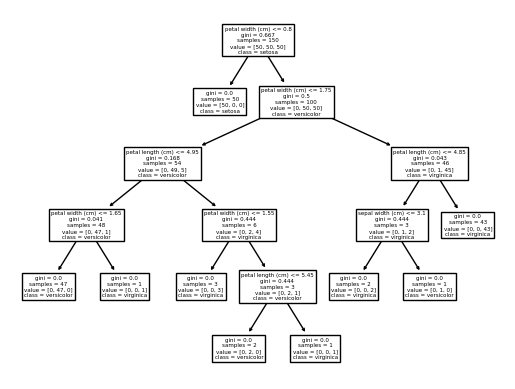

In [13]:
# tree plot

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# plt.figure(figsize=(15, 10), dpi=200)
plot_tree(clf, feature_names=iris.feature_names,
               class_names=iris.target_names);

In [14]:
# Perceptron
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

# Create a large dataset
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2)

# Init/Fit/Score
clf = Perceptron()
_ = clf.fit(X, y)

clf.score(X, y)

0.85317

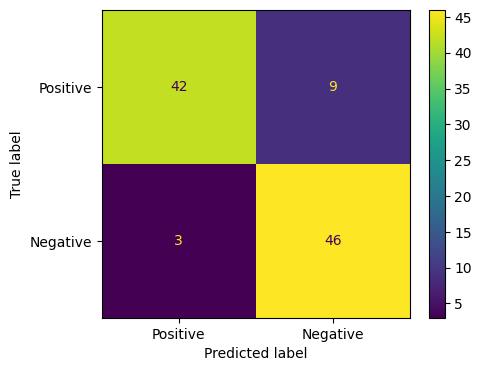

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

clf = ExtraTreeClassifier().fit(X_train, y_train)
y_preds = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
cmp.plot(ax=ax);

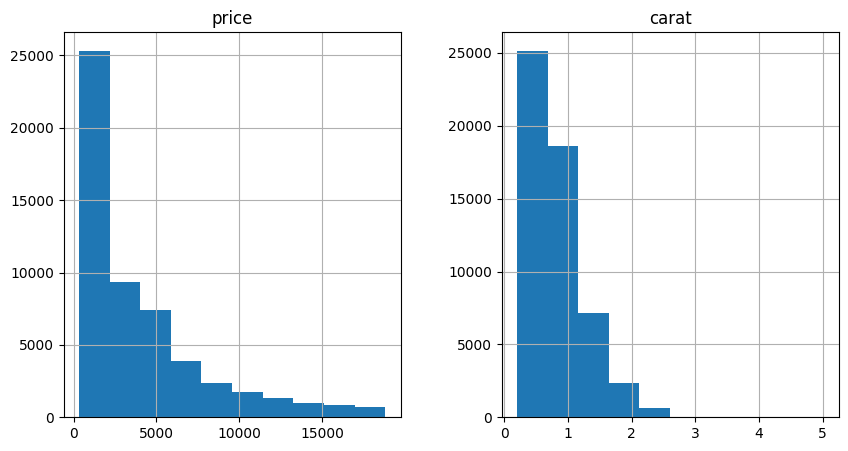

In [25]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds[["price", "carat"]].hist(figsize=(10, 5));

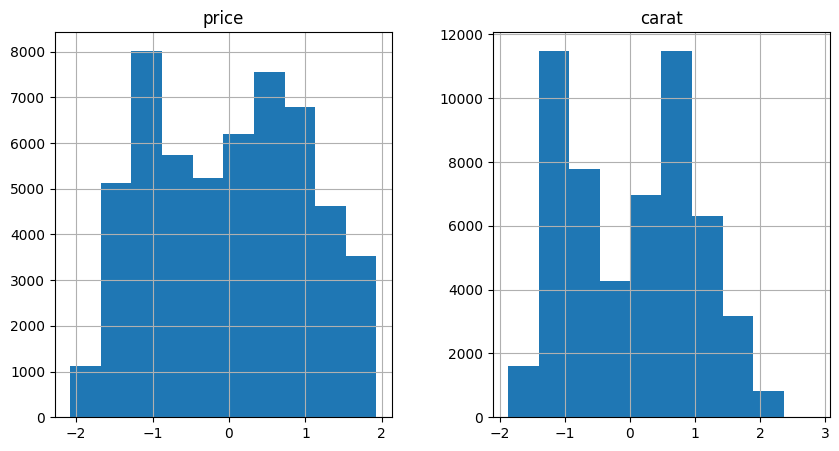

In [26]:
# normalize
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
diamonds.loc[:, ["price", "carat"]] = pt.fit_transform(diamonds[["price", "carat"]])

diamonds[["price", "carat"]].hist(figsize=(10, 5));

In [27]:
# ordinal transformer
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = [
    ["class_1", "rank_1"],
    ["class_1", "rank_3"],
    ["class_3", "rank_3"],
    ["class_2", "rank_2"],
]

oe.fit_transform(X)

array([[0., 0.],
       [0., 2.],
       [2., 2.],
       [1., 1.]])